# **GMM Based Clustering On Obesity dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,PowerTransformer, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [3]:
# Function to load datasets
def load_data(dataset_name):
    if dataset_name == 'students':
        data = pd.read_csv('/content/drive/MyDrive/ML2 Project/Student-Dataset.csv')
    elif dataset_name == 'obesity':
        data = pd.read_csv('/content/drive/MyDrive/ML2 Project/ObesityDataSet.csv')
    else:
        raise ValueError("Dataset not recognized")
    return data

In [4]:
data = load_data('obesity')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
data.shape

(2111, 17)

## Checking Missing Values

In [8]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [9]:
mydata = data.copy()
data.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
# Calculatiing columns types and printing them separately
bool_columns = data.select_dtypes(include=['bool']).columns
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
cat_columns = data.select_dtypes(include=['object']).columns

print("Boolean columns:", bool_columns.tolist())
print("Numerical columns:", num_columns.tolist())
print("Categorical columns:", cat_columns.tolist())

Boolean columns: []
Numerical columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


## **Check Outliers**

In [12]:
def remove_outliers(df, numerical_columns):
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

data = remove_outliers(data, numerical_columns)

## **Distribution of Categorical features**

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


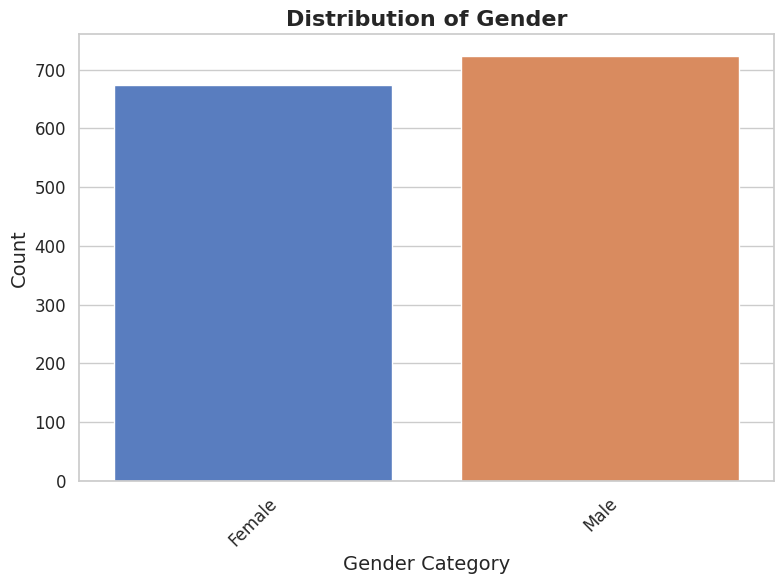

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


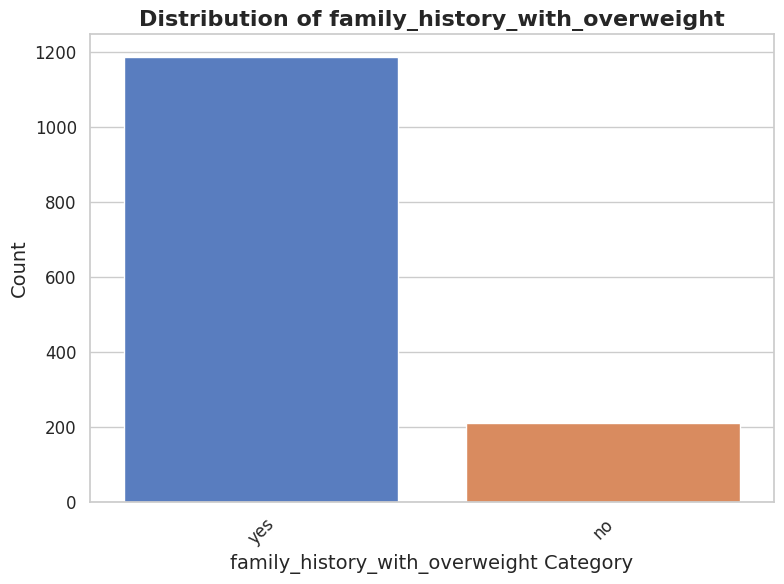

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


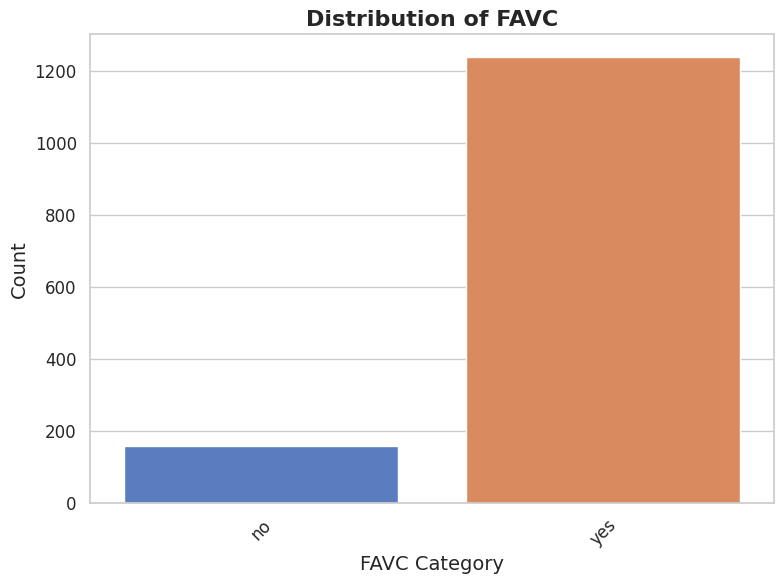

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


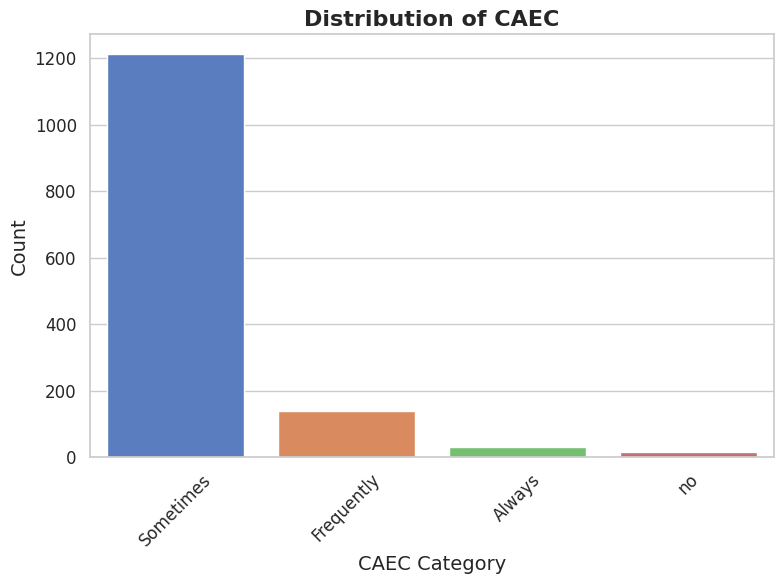

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


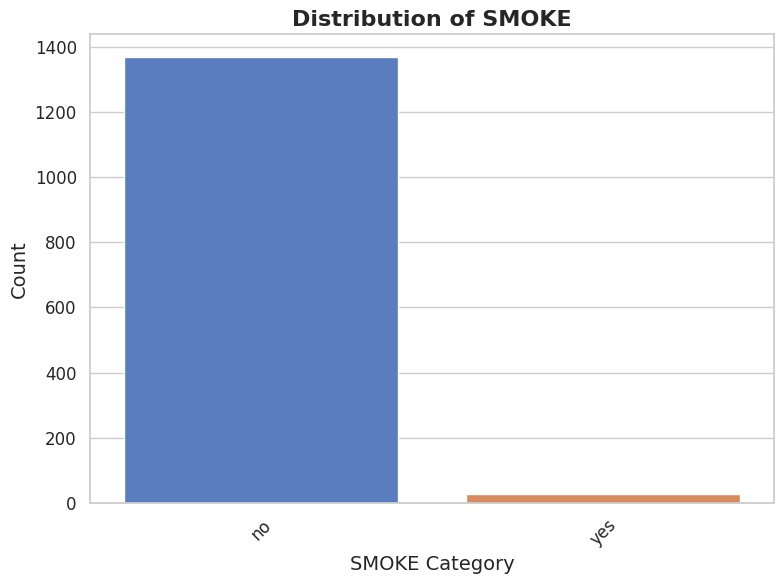

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


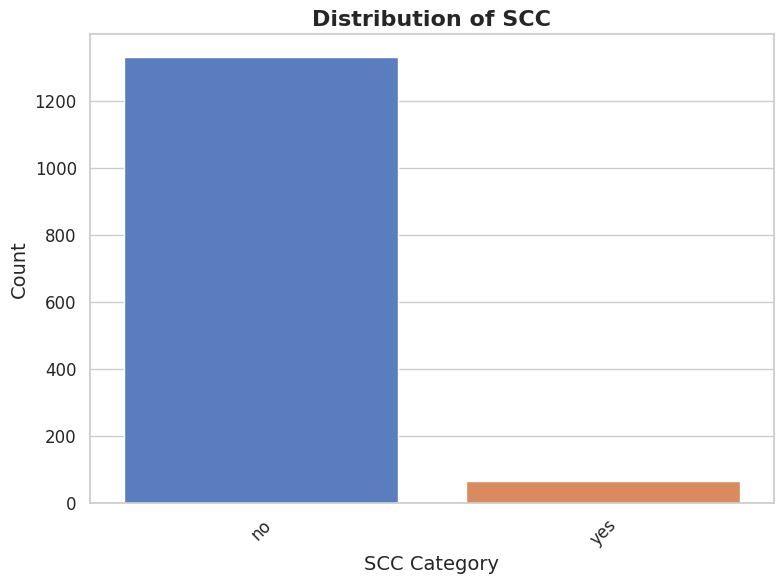

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


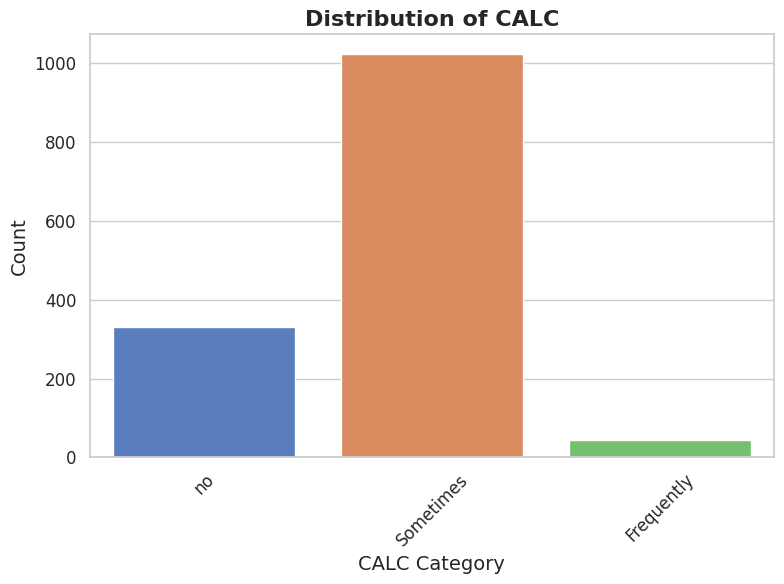

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


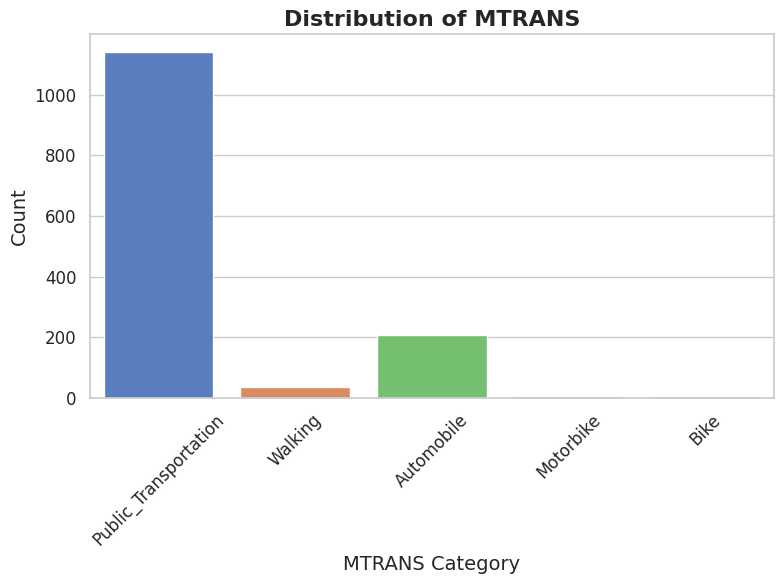

<ipython-input-16-6003a257397b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=data, palette='muted')  # Apply a muted palette for a balanced look


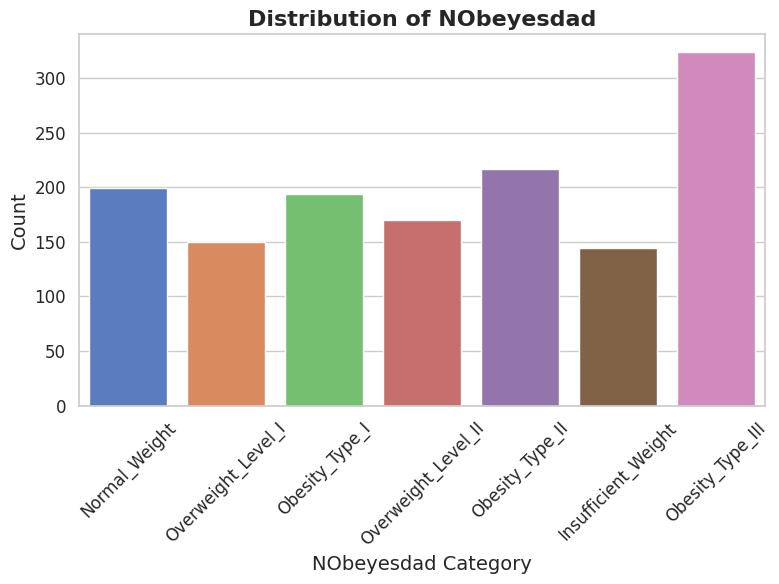

In [16]:
features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Set Seaborn theme
sns.set_theme(style="whitegrid")

for f in features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=f, data=data, palette='muted')

    # Add titles and labels
    plt.title(f'Distribution of {f}', fontsize=16, weight='bold')
    plt.xlabel(f'{f} Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

## **Hostogram of Numerical features**

<Figure size 800x600 with 0 Axes>

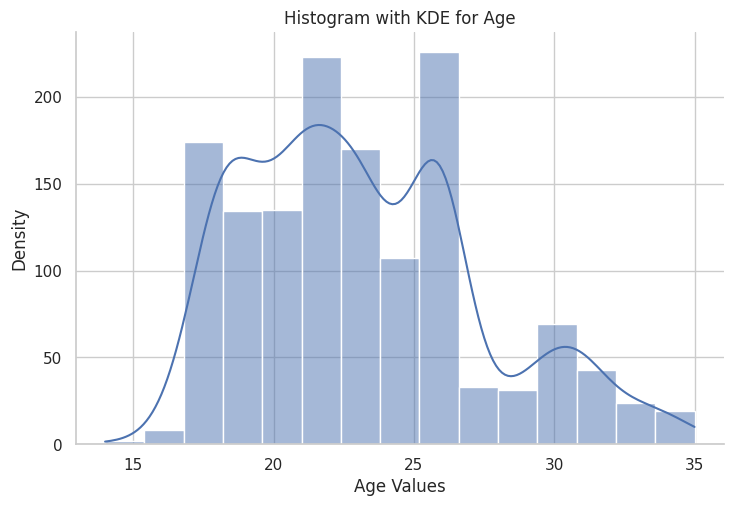

<Figure size 800x600 with 0 Axes>

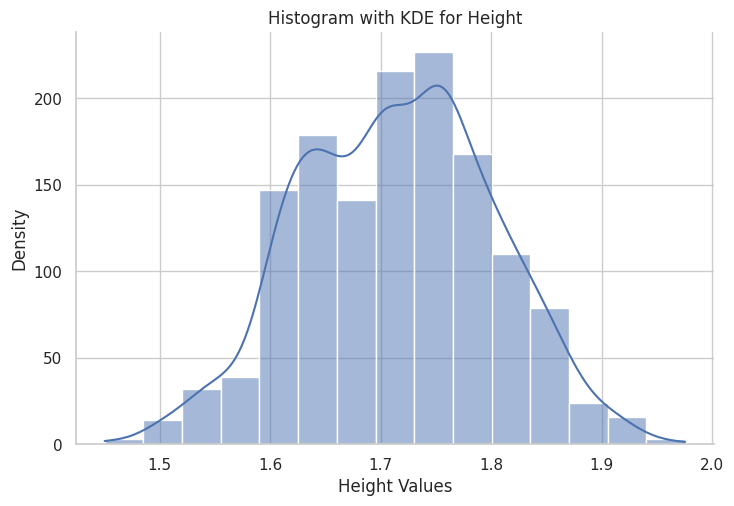

<Figure size 800x600 with 0 Axes>

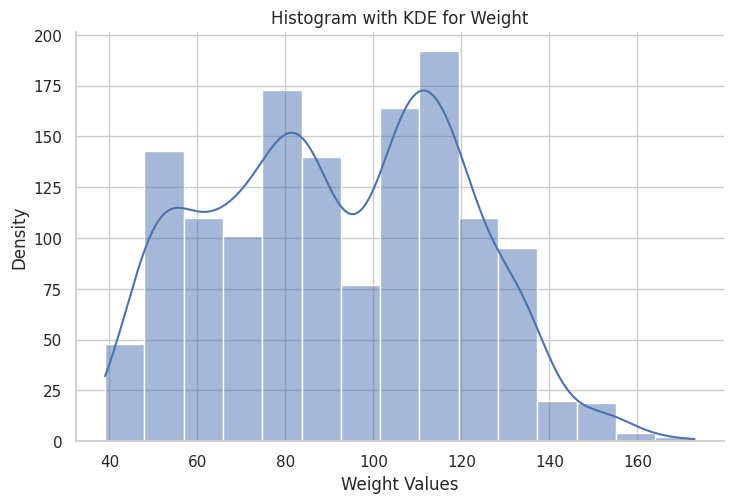

<Figure size 800x600 with 0 Axes>

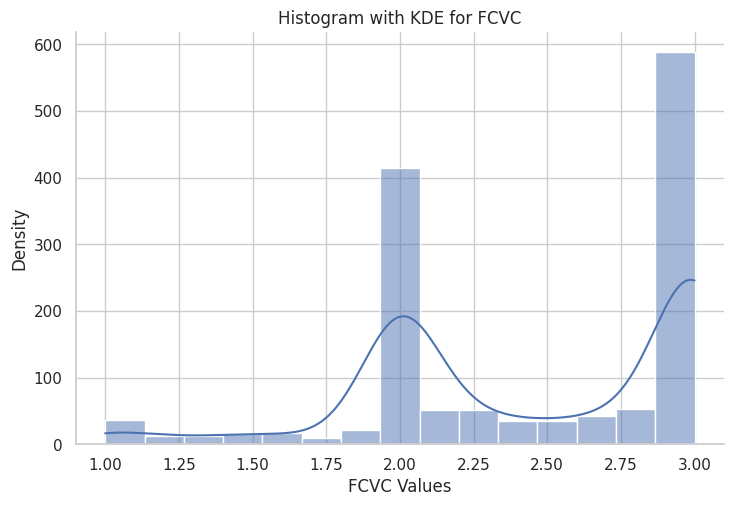

<Figure size 800x600 with 0 Axes>

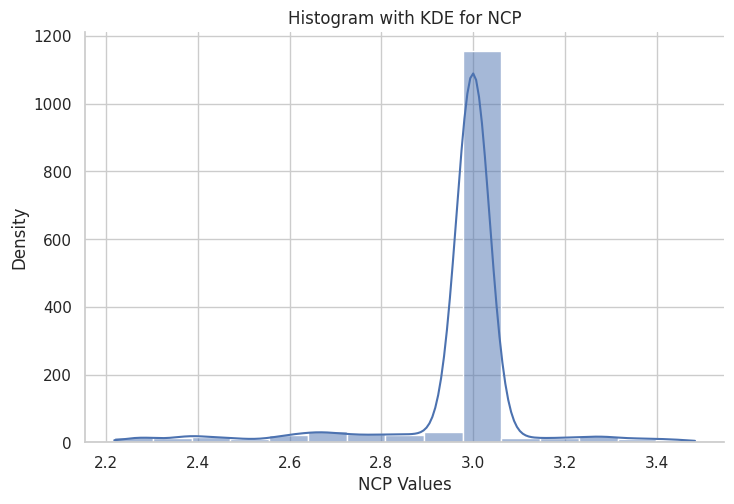

<Figure size 800x600 with 0 Axes>

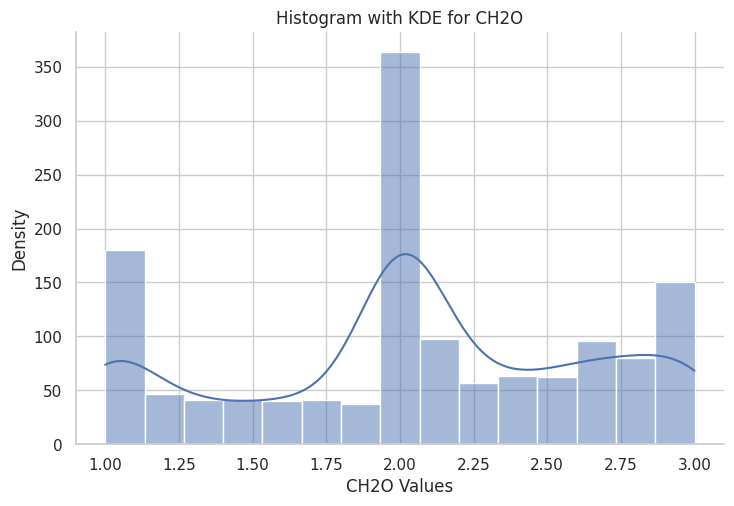

<Figure size 800x600 with 0 Axes>

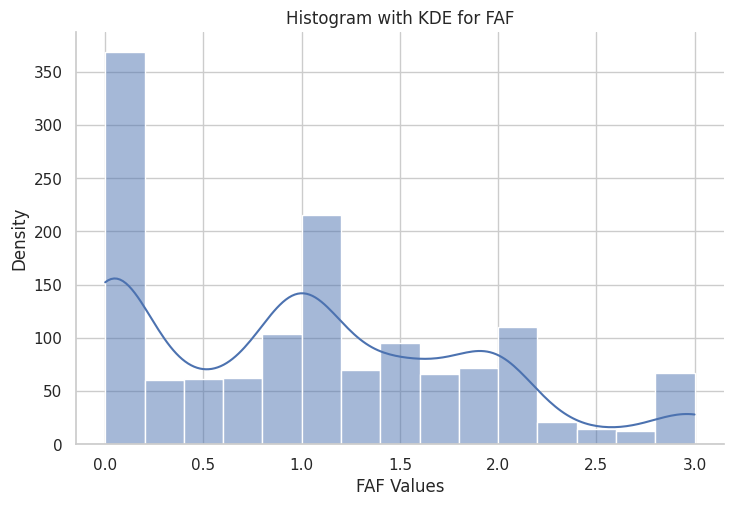

<Figure size 800x600 with 0 Axes>

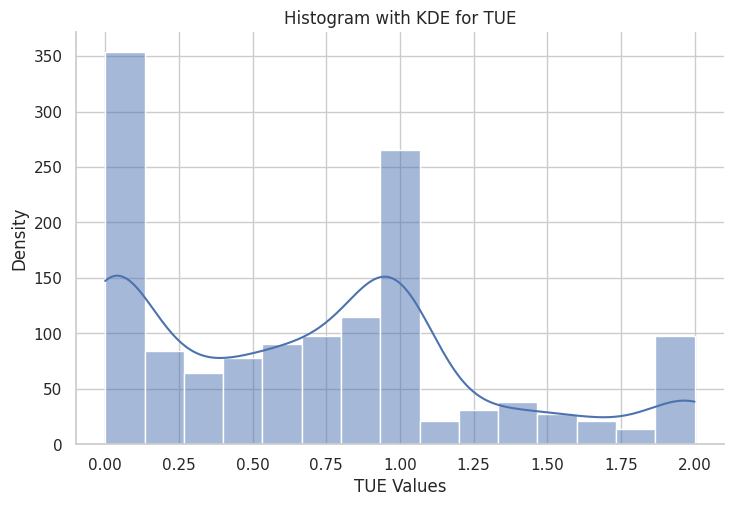

In [18]:
num_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.displot(data[feature], kde=True, bins=15, aspect=1.5)

    plt.title(f"Histogram with KDE for {feature}")
    plt.xlabel(f"{feature} Values")
    plt.ylabel("Density")

    # Display the plot
    plt.show()


# **Data Visulaization**


1.   Piecharts for each numerical column
2.   Hostogram
3.   Coorelation Heatmap Analysis



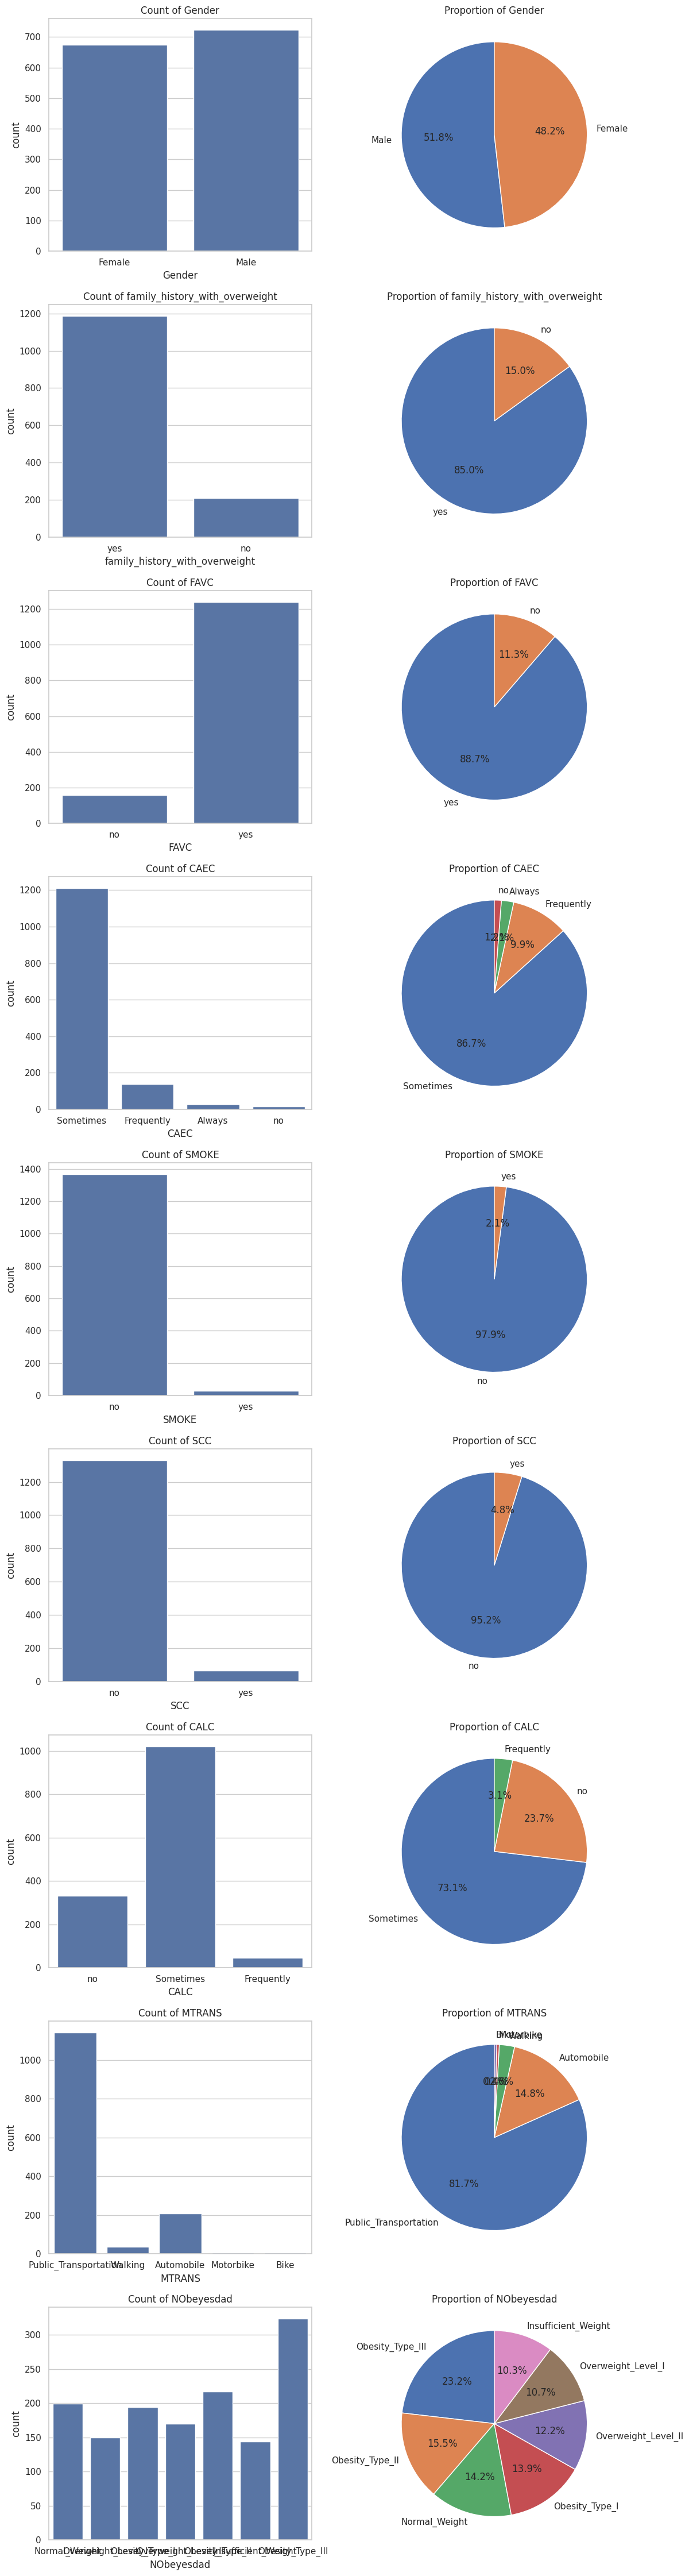

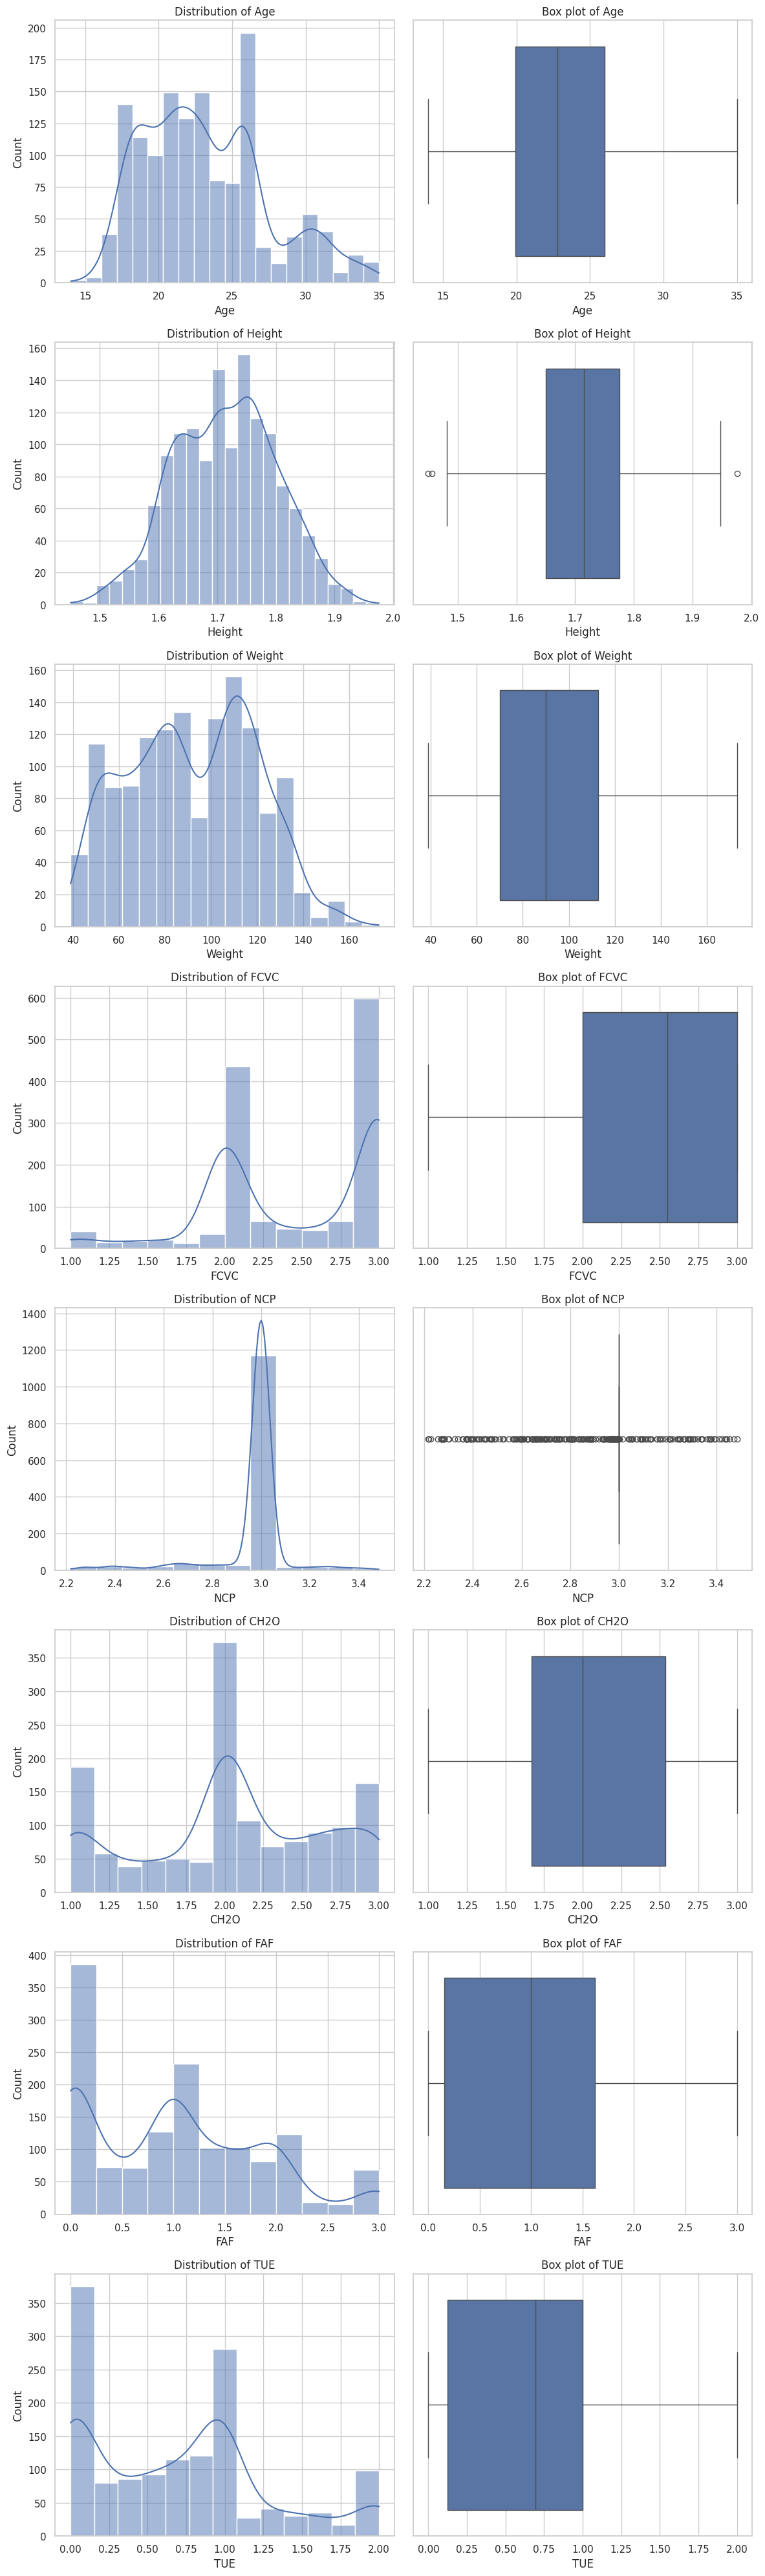

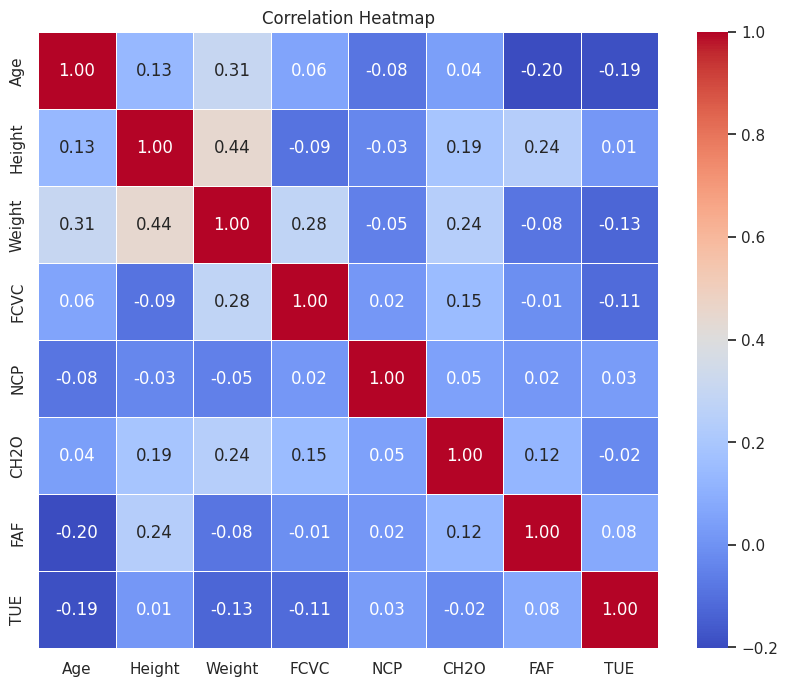

In [19]:
sns.set(style="whitegrid")

categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(12, len(categorical_columns) * 5))

for i, column in enumerate(categorical_columns):
    # Bar plot for frequency count
    sns.countplot(x=column, data=data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Count of {column}')

    # Pie chart for proportions
    pie_data = data[column].value_counts()
    axes[i, 1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Proportion of {column}')

plt.tight_layout()
plt.show()

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 5))

for i, column in enumerate(numerical_columns):
    # Histogram for distribution
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')

    # Box plot for detecting outliers
    sns.boxplot(x=data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

# 3. Correlation heatmap for numerical columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **One-hot Encoding**

In [20]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(data[cat_columns])
encoded_data = np.hstack(
    (StandardScaler().fit_transform(data[num_columns]), encoded_categorical)
)

# **PCA and t-SNE Visulization**

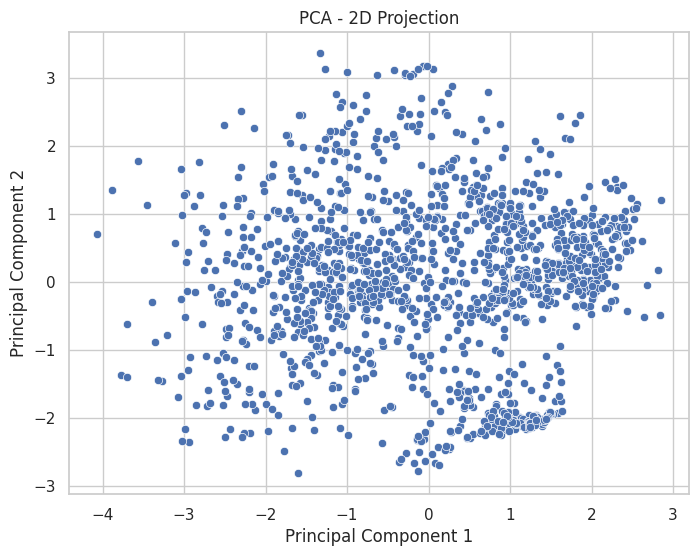

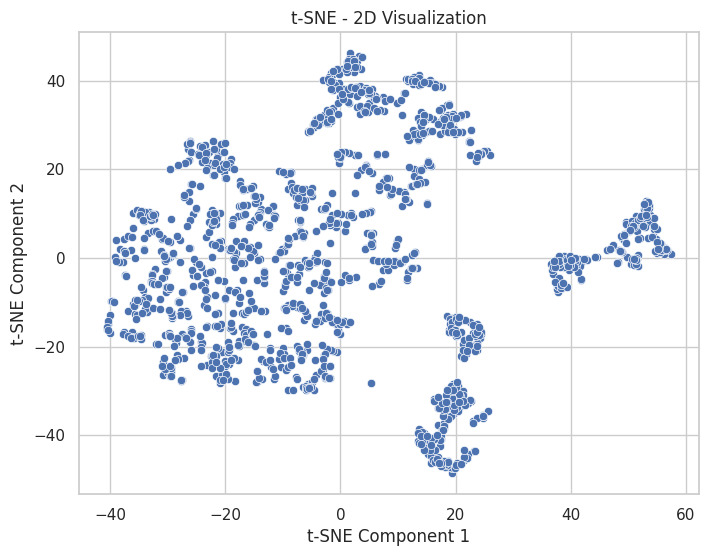

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1398 samples in 0.001s...
[t-SNE] Computed neighbors for 1398 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1398
[t-SNE] Computed conditional probabilities for sample 1398 / 1398
[t-SNE] Mean sigma: 0.704896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.191422
[t-SNE] KL divergence after 300 iterations: 0.989283


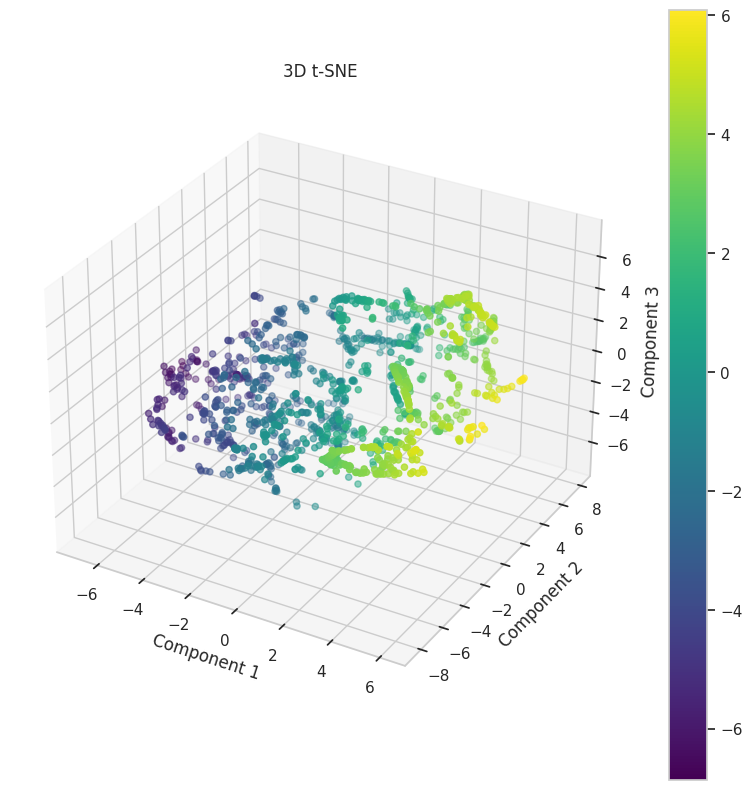

In [28]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)
#PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#  t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(encoded_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
plt.title('t-SNE - 2D Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# TSNE 3D visulaization
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(encoded_data)
TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['component1', 'component2', 'component3'])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D t-SNE')
scatter = ax.scatter(xs=TSNE_dataset['component1'],
                         ys=TSNE_dataset['component2'],
                         zs=TSNE_dataset['component3'],
                         c=TSNE_dataset['component1'],
                         cmap='viridis')
ax.set_xlabel(' Component 1')
ax.set_ylabel(' Component 2')
ax.set_zlabel(' Component 3')
plt.colorbar(scatter)
plt.show()

# **GMM implementation**

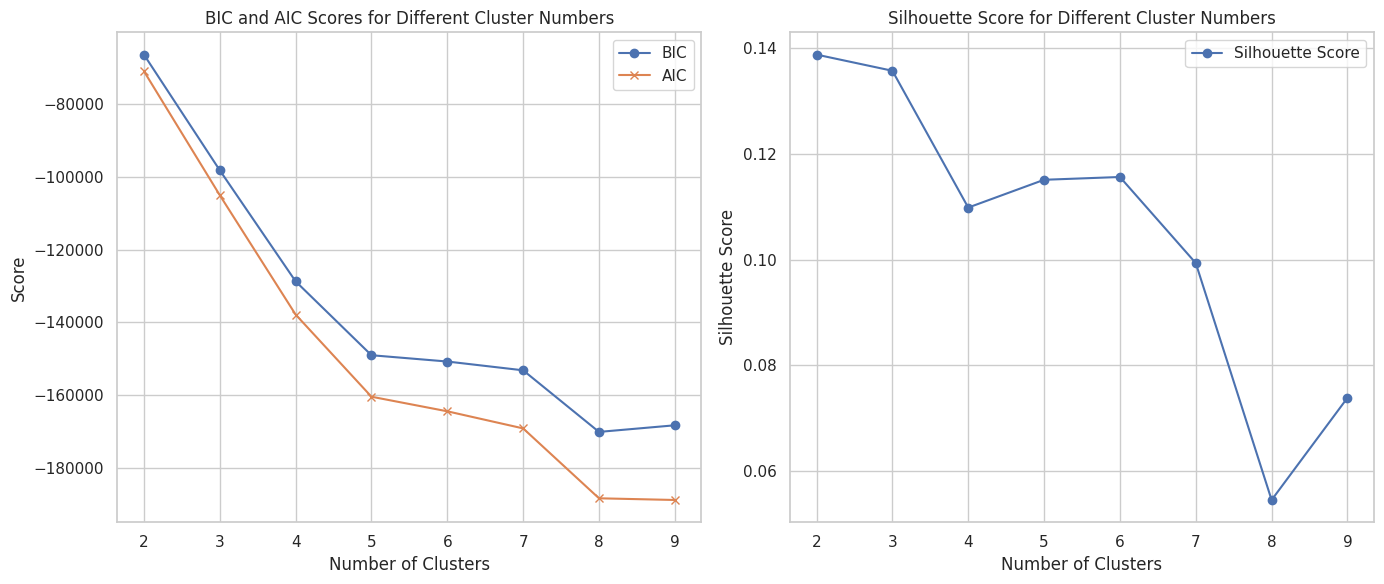

In [29]:
silhouette_scores = []
cluster_range = range(2, 10)
bic_scores = []
aic_scores = []

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(encoded_data)

    # BIC and AIC
    bic_scores.append(gmm.bic(encoded_data))
    aic_scores.append(gmm.aic(encoded_data))

    silhouette_scores.append(silhouette_score(encoded_data, labels))

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, bic_scores, marker='o', label='BIC')
plt.plot(cluster_range, aic_scores, marker='x', label='AIC')
plt.title('BIC and AIC Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()

# Plot Silhouette Scores with visualization
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

# **Applying GMM and evaluting it on origina data (Without Transformation)**

Silhouette Score (GMM): 0.1388360224831866
Davies-Bouldin Index (GMM): 2.5679833518653052


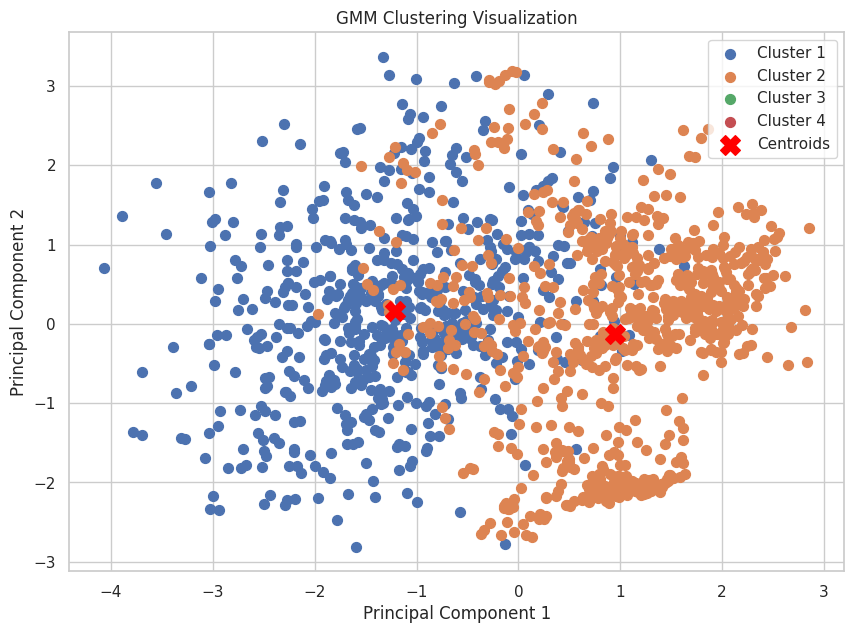

In [30]:
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(encoded_data)

silhouette_gmm = silhouette_score(encoded_data, labels_gmm)
davies_bouldin_gmm = davies_bouldin_score(encoded_data, labels_gmm)

print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (GMM): {davies_bouldin_gmm}")

pca = PCA(n_components=2)
reduced_data_gmm = pca.fit_transform(encoded_data)

plt.figure(figsize=(10, 7))

for cluster in range(4):
    plt.scatter(
        reduced_data_gmm[labels_gmm == cluster, 0],
        reduced_data_gmm[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )

centroids_gmm = gmm.means_
reduced_centroids_gmm = pca.transform(centroids_gmm)
plt.scatter(
    reduced_centroids_gmm[:, 0],
    reduced_centroids_gmm[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title("GMM Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## **After GMM, PCA & TSNE Visulaization**

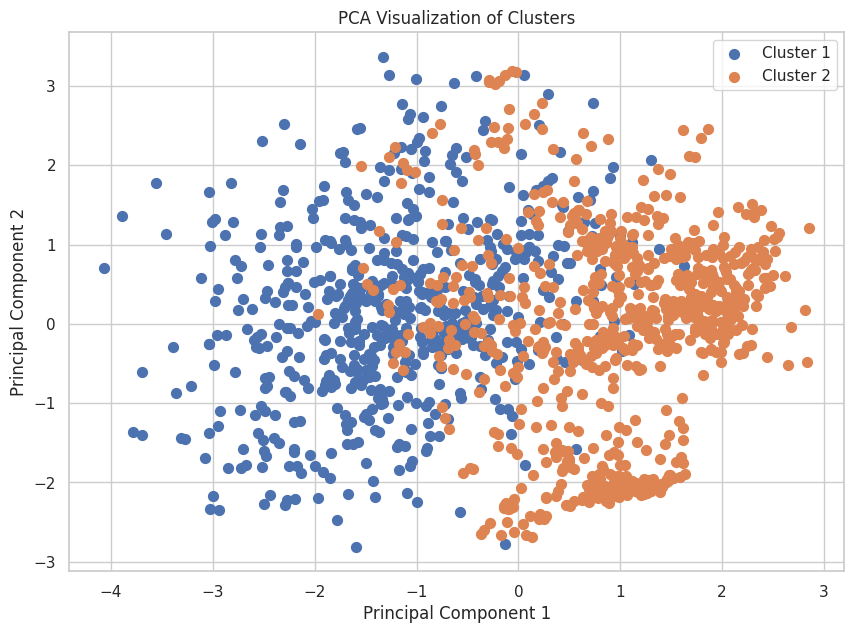

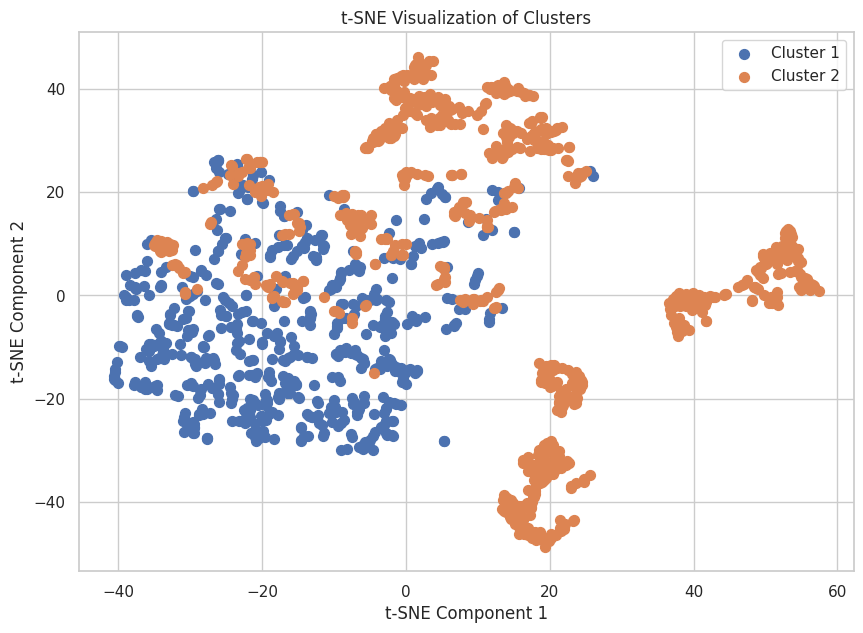

In [31]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(encoded_data)

#  t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(encoded_data)

#  PCA visualization
plt.figure(figsize=(10, 7))
for cluster in np.unique(labels_gmm):
    plt.scatter(
        reduced_data_pca[labels_gmm == cluster, 0],
        reduced_data_pca[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )
plt.title("PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
for cluster in np.unique(labels_gmm):
    plt.scatter(
        reduced_data_tsne[labels_gmm == cluster, 0],
        reduced_data_tsne[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

# **Transformation**

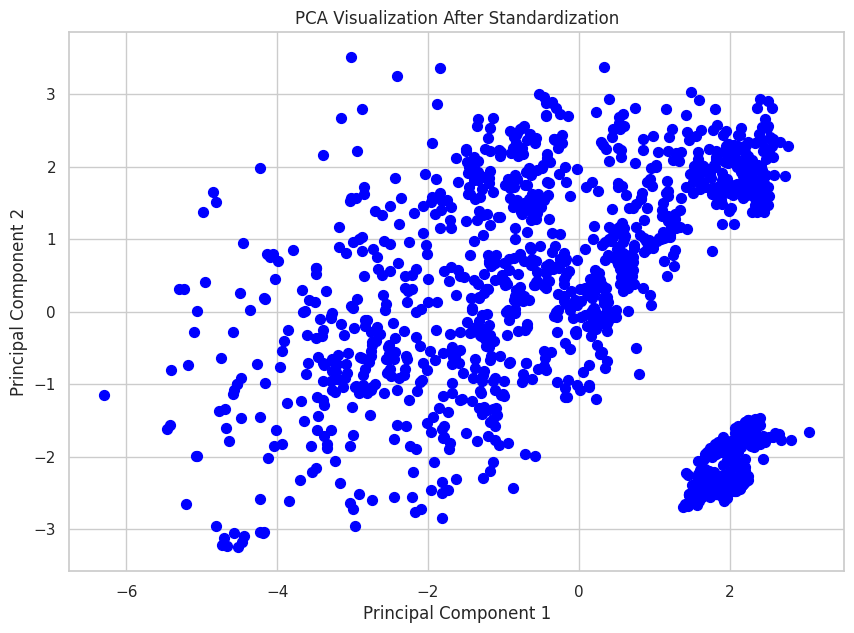

In [32]:
#Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=50)
plt.title("PCA Visualization After Standardization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **Transformer Method:yeo-johnson Transformation on my dataset**

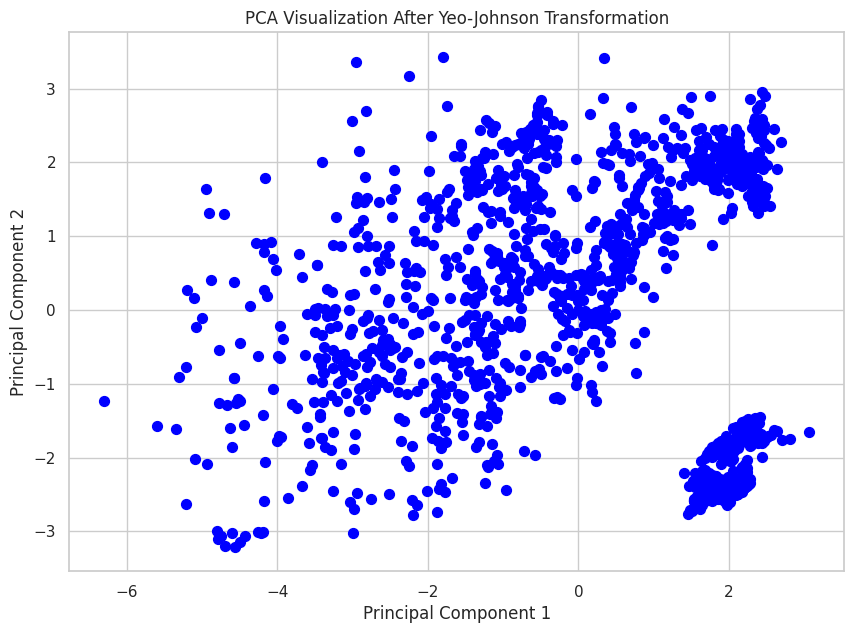

In [33]:
# Apply Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')

transformed_data = transformer.fit_transform(encoded_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualize results
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=50)
plt.title("PCA Visualization After Yeo-Johnson Transformation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **GMM on transformation data**

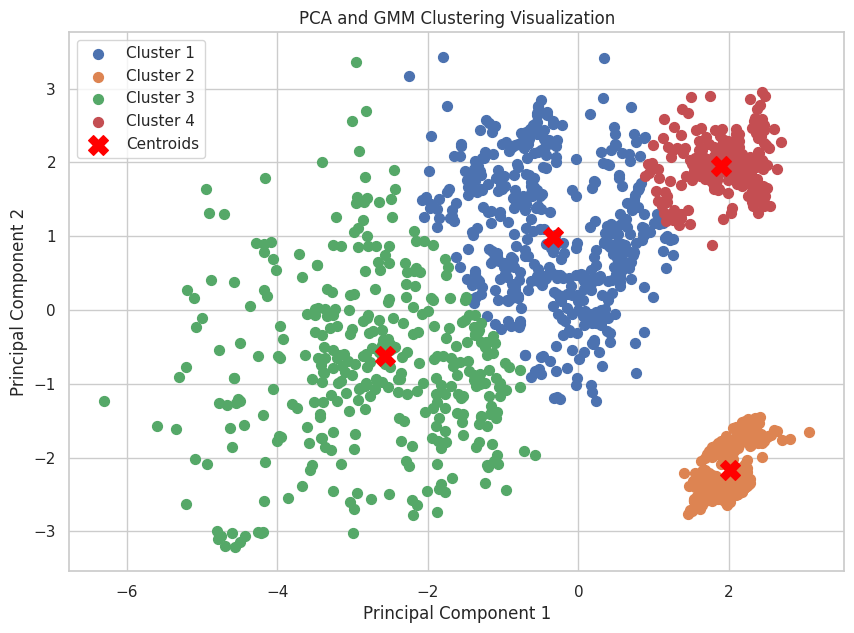

AIC: 8845.57766392278
BIC: 8966.162016147036
Silhouette Score: 0.5271827582009453


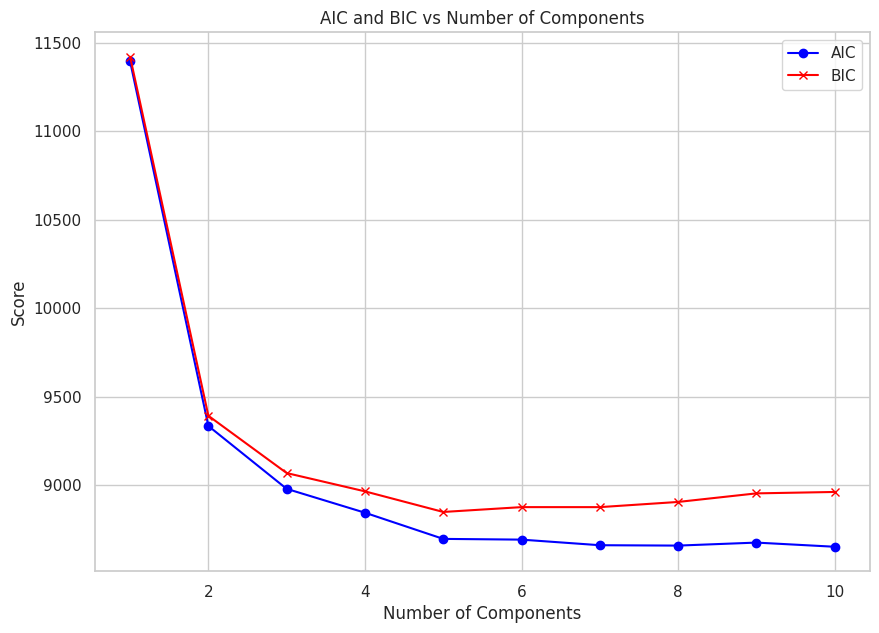

In [37]:
#  Apply Yeo-Johnson transformation data
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(encoded_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Fit a GMM model
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(reduced_data)

plt.figure(figsize=(10, 7))

for cluster in range(4):  # Assuming 4 clusters from GMM
    plt.scatter(
        reduced_data[labels_gmm == cluster, 0],
        reduced_data[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )
centroids_gmm = gmm.means_
plt.scatter(
    centroids_gmm[:, 0],
    centroids_gmm[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title("PCA and GMM Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

aic = gmm.aic(reduced_data)
bic = gmm.bic(reduced_data)

silhouette = silhouette_score(reduced_data, labels_gmm)

print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"Silhouette Score: {silhouette}")

n_components_range = range(1, 11)
aic_scores = []
bic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(reduced_data)
    aic_scores.append(gmm.aic(reduced_data))
    bic_scores.append(gmm.bic(reduced_data))

# Plotting the AIC and BIC scores
plt.figure(figsize=(10, 7))
plt.plot(n_components_range, aic_scores, label="AIC", color='blue', marker='o')
plt.plot(n_components_range, bic_scores, label="BIC", color='red', marker='x')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("AIC and BIC vs Number of Components")
plt.legend()
plt.show()


In [35]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
5,Male,29.000000,1.620000,53.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [38]:
features = data.columns
features

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [39]:
#reduce dimesion for mathcing
print("Length of reduced_data:", len(reduced_data))
print("Length of mydata:", len(mydata))

if len(reduced_data) != len(mydata):
    mydata = mydata.iloc[:len(reduced_data)].copy()

mydata['Cluster'] = labels_gmm


Length of reduced_data: 1398
Length of mydata: 2111


# **Radar plot for individual clustering**

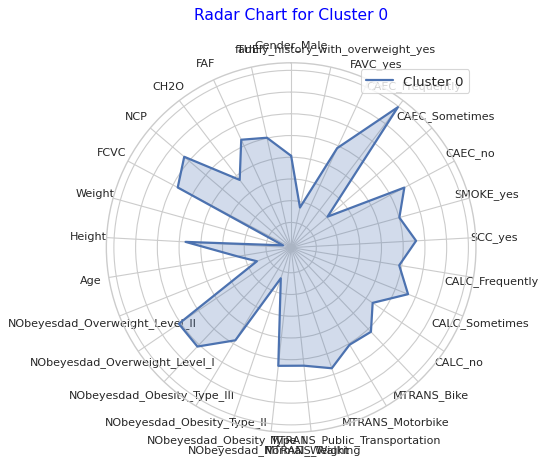

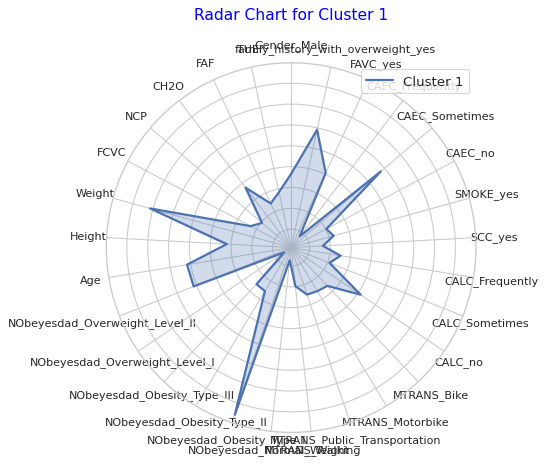

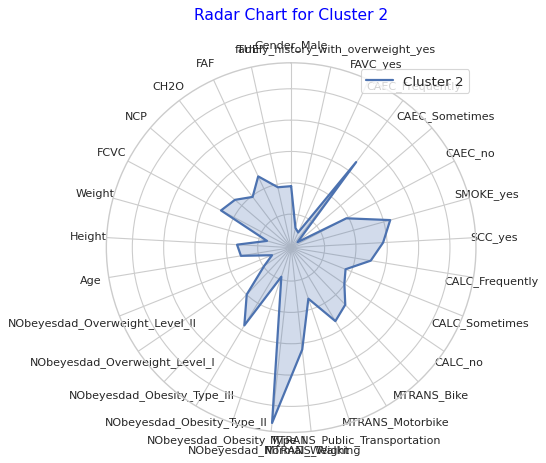

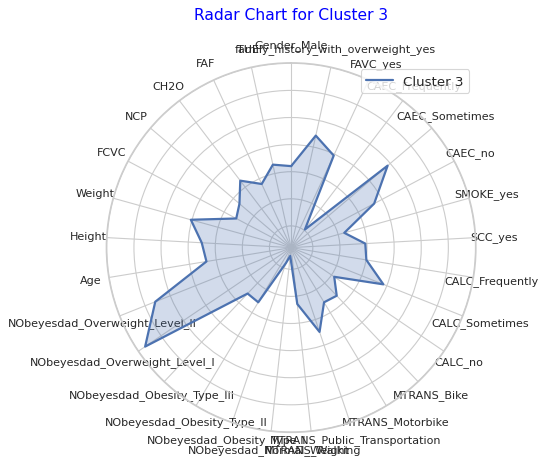

In [40]:
categorical_columns = mydata.select_dtypes(include=['object']).columns.tolist()
numerical_columns = mydata.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)  # Use sparse=False for dense output
    ],
    remainder='passthrough'
)

encoded_data = preprocessor.fit_transform(mydata)

encoded_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)

all_columns = list(encoded_columns) + numerical_columns
encoded_data_df = pd.DataFrame(encoded_data, columns=all_columns)

encoded_data_df['Cluster'] = mydata['Cluster']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data_df.drop('Cluster', axis=1))

encoded_data_scaled_df = pd.DataFrame(scaled_data, columns=encoded_data_df.drop('Cluster', axis=1).columns)
encoded_data_scaled_df['Cluster'] = encoded_data_df['Cluster']

# Compute the average of each feature for each cluster
cluster_means = encoded_data_scaled_df.groupby('Cluster').mean()

#  Plot Radar Chart for each cluster
labels = cluster_means.columns  # Feature names
num_clusters = len(cluster_means)

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

# Plot for each cluster
for cluster in range(num_clusters):
    values = cluster_means.iloc[cluster].tolist()
    values += values[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), dpi=80, subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)

    ax.set_title(f"Radar Chart for Cluster {cluster}", size=14, color='blue', y=1.1)

    plt.legend(loc='upper right', fontsize=12)
    plt.show()


In [ ]:
# n_clusters=np.arange(2, 8)
# bics=[]
# bics_err=[]
# iterations=20
# for n in n_clusters:
#     tmp_bic=[]
#     for _ in range(iterations):
#         gmm=GaussianMixture(n, n_init=2).fit(X_principal)

#         tmp_bic.append(gmm.bic(X_principal))
#     val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
#     err=np.std(tmp_bic)
#     bics.append(val)
#     bics_err.append(err)

# ***Analysis of results before transformation & after Transformation***

## **Before Transormation**
Silhouette Score (GMM): 0.1388360224831866

Davies-Bouldin Index (GMM): 2.5679833518653052

## **After Transformation**

AIC: 8845.57766392278

BIC: 8966.162016147036

Silhouette Score: 0.5271827582009453


## ***The Yeo-Johnson transformation significantly improved the clustering results. Before transformation the clusters were poorly defined and overlapping. After transformation, the clusters became more distinct and well-separated, as indicated by the improved Silhouette Score and lower AIC and BIC values. This suggests that the transformation helped to reveal the underlying structure of the data leading to a more accurate and informative clustering.***
